### Prediction of the dG values - Second Version

Free energy of unfolding (dG = ΔG): Change in Gibbs free energy going from the folded to the unfolded state; this parameter belongs to the thermodynamic stability.

In [1]:
#Import Pyrosetta
import pyrosetta; pyrosetta.init()

PyRosetta-4 2023 [Rosetta PyRosetta4.conda.linux.cxx11thread.serialization.CentOS.python310.Release 2023.27+release.e3ce6ea9faf661ae8fa769511e2a9b8596417e58 2023-07-07T12:00:46] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.conda.linux.cxx11thread.serialization.CentOS.python310.Release r353 2023.27+release.e3ce6ea e3ce6ea9faf661ae8fa769511e2a9b8596417e58 http://www.pyrosetta.org 2023-07-07T12:00:46
core.init: command: PyRosetta -ex1 -ex2aro -database /home/rebeccalinux/miniconda3/lib/python3.10/site-packages/pyrosetta/database
basic.random.init_random_generator: 'RNG device' seed mode, using '/dev/urandom', seed=1992002970 seed_offset=0 real_seed=1992002970 thread_index=0
basic.random.init_random_generator: RandomGenerator:init: Normal mode, seed=1992002970 RG_type=mt19937


In [2]:
import pyrosetta
from Bio.PDB import PDBParser, PDBIO
import pandas as pd
import os

# Path to the downloaded PDB file
pdb_file = '/mnt/c/Users/uni.rebecca.ress/Documents/rebecca.ress/Universität Heidelberg/4. Fachsemester/4. Fachsemester/Bioinformatik Projekt Niopek/Daten/AF-P42212-F1-model_v4.pdb'

# Create a PDB parser object
parser = PDBParser()

# Open the Biopython PDB object
biopython_structure = parser.get_structure('protein', pdb_file)

# Create a temporary PDB file
temp_pdb_file = 'temp.pdb'

# Create a PDBIO object
pdbio = PDBIO()

# Save the PDB file
pdbio.set_structure(biopython_structure)
pdbio.save(temp_pdb_file)

# Convert the PDB file to a PyRosetta Pose
pyrosetta.init()
pose = pyrosetta.pose_from_pdb(temp_pdb_file)

# Create a ScoreFunction object
scorefxn = pyrosetta.get_score_function()

# Create a Monte Carlo object
monte_carlo = pyrosetta.rosetta.protocols.moves.MonteCarlo(scorefxn, 1.0)

# Perform Monte Carlo sampling
monte_carlo.set_temperature(1.0)
pose_copy = pose.clone()
monte_carlo.boltzmann(pose_copy)

# Load the wildtype sequence from the pose
wildtype_sequence = pose.sequence()

# Calculate the ΔG value for the wildtype
wildtype_energy = scorefxn(pose)

# Save the ΔG value of the wildtype as a DataFrame
df_avGFP_WT_dG = pd.DataFrame({'ΔG value of the wildtype': [wildtype_energy]})

# Print the DataFrame
print(df_avGFP_WT_dG)

# Delete the temporary PDB file
os.remove(temp_pdb_file)

PyRosetta-4 2023 [Rosetta PyRosetta4.conda.linux.cxx11thread.serialization.CentOS.python310.Release 2023.27+release.e3ce6ea9faf661ae8fa769511e2a9b8596417e58 2023-07-07T12:00:46] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.conda.linux.cxx11thread.serialization.CentOS.python310.Release r353 2023.27+release.e3ce6ea e3ce6ea9faf661ae8fa769511e2a9b8596417e58 http://www.pyrosetta.org 2023-07-07T12:00:46
core.init: command: PyRosetta -ex1 -ex2aro -database /home/rebeccalinux/miniconda3/lib/python3.10/site-packages/pyrosetta/database
basic.random.init_random_generator: 'RNG device' seed mode, using '/dev/urandom', seed=303260734 seed_offset=0 real_seed=303260734 thread_index=0
basic.random.init_random_generator: RandomGenerator:init: Normal mode, seed=303260734 RG_type=mt19937
core.chemical.Glo

In [3]:
df_GFP_unaltered = pd.read_csv('/mnt/c/Users/uni.rebecca.ress/Documents/rebecca.ress/Universität Heidelberg/4. Fachsemester/4. Fachsemester/Bioinformatik Projekt Niopek/Daten/GFP_AEQVI_Sarkisyan_2016.csv')

df_GFP_single = df_GFP_unaltered[~df_GFP_unaltered['mutant'].str.contains(':')]
df_GFP_single_split = df_GFP_single.copy()
df_GFP_single_split[['old AA', 'Position', 'new AA']] = df_GFP_single['mutant'].str.extract(r'(\w)(\d+)(\w)')

print(df_GFP_single_split)

      mutant                                   mutated_sequence  DMS_score  \
4        K3R  MSRGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.738586   
48       K3Q  MSQGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.750487   
703      K3E  MSEGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.666278   
924      K3M  MSMGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.698336   
1160     K3T  MSTGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.629775   
...      ...                                                ...        ...   
51709  Y237N  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.809468   
51710  Y237C  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.760217   
51711  Y237D  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.754101   
51712  Y237F  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.673173   
51713  Y237H  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.735417   

       DMS_score_bin old AA Position new AA  
4                

In [4]:
import pyrosetta
from Bio.PDB import PDBParser, PDBIO
import pandas as pd

# Path to the downloaded PDB file
pdb_file = '/mnt/c/Users/uni.rebecca.ress/Documents/rebecca.ress/Universität Heidelberg/4. Fachsemester/4. Fachsemester/Bioinformatik Projekt Niopek/Daten/AF-P42212-F1-model_v4.pdb'

# Create PDB parser object
parser = PDBParser()

# Open the Biopython PDB object
biopython_structure = parser.get_structure('protein', pdb_file)

# Create temporary PDB file
temp_pdb_file = 'temp.pdb'

# Create PDBIO object
pdbio = PDBIO()

# Save the PDB file
pdbio.set_structure(biopython_structure)
pdbio.save(temp_pdb_file)

# Convert the PDB file to a PyRosetta pose
pyrosetta.init()
pose = pyrosetta.pose_from_pdb(temp_pdb_file)

# Create a ScoreFunction object
scorefxn = pyrosetta.get_score_function()

# Create a Monte Carlo object
monte_carlo = pyrosetta.rosetta.protocols.moves.MonteCarlo(scorefxn, 1.0)

# Perform Monte Carlo sampling
monte_carlo.set_temperature(1.0)
pose_copy = pose.clone()
monte_carlo.boltzmann(pose_copy)


# Load the wildtype sequence from the pose
wildtype_sequence = pose.sequence()

# Load the DataFrame with the mutations
df = pd.DataFrame({
    'mutant': df_GFP_single_split['mutant'],
    'mutated_sequence': df_GFP_single_split['mutated_sequence'],
    'old_aa': df_GFP_single_split['old AA'],
    'position': df_GFP_single_split['Position'],
    'new_aa': df_GFP_single_split['new AA'],
    'DMS score': df_GFP_single_split['DMS_score']
})

# Convert the value in the "position" column to an integer
df['position'] = df['position'].astype(int)

# Create a list for the results
results = []

# Calculate the ΔG value for each mutation
for index, row in df.iterrows():
    # Check if the position is valid in the sequence
    if row['position'] <= len(wildtype_sequence):
        # Copy the wildtype sequence for each mutation
        mutated_sequence = wildtype_sequence

        # Perform the mutation
        position = row['position'] - 1  # Convert to 0-based index
        mutated_sequence = mutated_sequence[:position] + row['new_aa'] + mutated_sequence[position+1:]

        # Generate the mutated pose from the mutated sequence
        mutated_pose = pyrosetta.pose_from_sequence(mutated_sequence)
        # Create a ScoreFunction object
        scorefxn = pyrosetta.get_score_function()

        # Create a Monte Carlo object
        monte_carlo = pyrosetta.rosetta.protocols.moves.MonteCarlo(scorefxn, 1.0)

        # Perform Monte Carlo sampling
        monte_carlo.set_temperature(0.0)
        pose_copy = mutated_pose.clone()
        monte_carlo.boltzmann(pose_copy)


        # Calculate the ΔG value for the mutation
        mutant_energy = scorefxn(mutated_pose)

        # Add the result to the list
        result = {
            'mutation': f"{row['old_aa']}{row['position']}{row['new_aa']}",
            'ΔG value': mutant_energy,
            'DMS score': row['DMS score'],
            'old AA': row['old_aa'],
            'Position': row['position'],
            'new AA': row['new_aa']
        }
        results.append(result)

# Create the DataFrame from the results
df_dG_single = pd.DataFrame(results)

# Delete the temporary PDB file
import os
os.remove(temp_pdb_file)

PyRosetta-4 2023 [Rosetta PyRosetta4.conda.linux.cxx11thread.serialization.CentOS.python310.Release 2023.27+release.e3ce6ea9faf661ae8fa769511e2a9b8596417e58 2023-07-07T12:00:46] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.conda.linux.cxx11thread.serialization.CentOS.python310.Release r353 2023.27+release.e3ce6ea e3ce6ea9faf661ae8fa769511e2a9b8596417e58 http://www.pyrosetta.org 2023-07-07T12:00:46
core.init: command: PyRosetta -ex1 -ex2aro -database /home/rebeccalinux/miniconda3/lib/python3.10/site-packages/pyrosetta/database
basic.random.init_random_generator: 'RNG device' seed mode, using '/dev/urandom', seed=1113094204 seed_offset=0 real_seed=1113094204 thread_index=0
basic.random.init_random_generator: RandomGenerator:init: Normal mode, seed=1113094204 RG_type=mt19937
core.import_po

In [5]:
print(df_dG_single)

     mutation      ΔG value  DMS score old AA  Position new AA
0         K3R  74402.304804   3.738586      K         3      R
1         K3Q  73151.301076   3.750487      K         3      Q
2         K3E  71995.079183   3.666278      K         3      E
3         K3M  72358.451424   3.698336      K         3      M
4         K3T  71570.950204   3.629775      K         3      T
...       ...           ...        ...    ...       ...    ...
1079    Y237N  72095.563655   3.809468      Y       237      N
1080    Y237C  71995.960937   3.760217      Y       237      C
1081    Y237D  72050.259630   3.754101      Y       237      D
1082    Y237F  72220.556124   3.673173      Y       237      F
1083    Y237H  72122.760073   3.735417      Y       237      H

[1084 rows x 6 columns]


In [6]:
df_dG_single['ΔΔG'] = df_dG_single['ΔG value'] - df_avGFP_WT_dG.iloc[0]['ΔG value of the wildtype']

df_ddG_single = df_dG_single

print(df_ddG_single)

     mutation      ΔG value  DMS score old AA  Position new AA           ΔΔG
0         K3R  74402.304804   3.738586      K         3      R  74866.059750
1         K3Q  73151.301076   3.750487      K         3      Q  73615.056023
2         K3E  71995.079183   3.666278      K         3      E  72458.834130
3         K3M  72358.451424   3.698336      K         3      M  72822.206371
4         K3T  71570.950204   3.629775      K         3      T  72034.705150
...       ...           ...        ...    ...       ...    ...           ...
1079    Y237N  72095.563655   3.809468      Y       237      N  72559.318601
1080    Y237C  71995.960937   3.760217      Y       237      C  72459.715883
1081    Y237D  72050.259630   3.754101      Y       237      D  72514.014576
1082    Y237F  72220.556124   3.673173      Y       237      F  72684.311070
1083    Y237H  72122.760073   3.735417      Y       237      H  72586.515020

[1084 rows x 7 columns]


In [10]:
negative_count = len(df_ddG_single[df_ddG_single['ΔΔG'] < 0])

positive_count = len(df_ddG_single[df_ddG_single['ΔΔG'] > 0])

print("counts of negative values: ", negative_count)
print("counts of positive values: ", positive_count)

counts of negative values:  0
counts of positive values:  1084


In [11]:
ddG_min = df_ddG_single['ΔΔG'].min()

ddG_max = df_ddG_single['ΔΔG'].max()

print("Min. ddG:", ddG_min)
print("Max. ddG:", ddG_max)

Min. ddG: 71547.49240388464
Max. ddG: 75868.20375975528


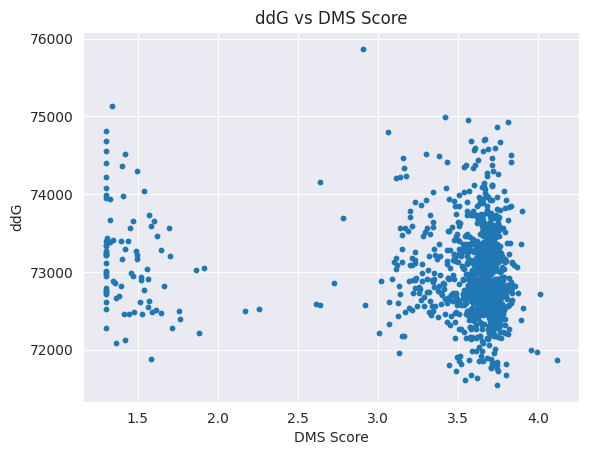

In [9]:
import matplotlib.pyplot as plt

plt.scatter(df_ddG_single['DMS score'], df_ddG_single['ΔΔG'], s=10)
plt.xlabel('DMS Score')
plt.ylabel('ddG')
plt.title('ddG vs DMS Score')

# Display the plot
plt.show()